# Notebook to make Figure 11

In [ ]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D

import seaborn as sns
cp = sns.color_palette('muted')
cp2 = sns.color_palette('pastel')
cp3 = sns.color_palette('dark')

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/different_total_masses/'

### Setup

Load data

In [1]:
# Load in frequency domain data 
frequency_domain_data = h5ify.load(data_dir+'waveforms_frequency_domain_different_total_masses.h5')

Set up plotting aesthetics

In [2]:
# masses to plot
masses_to_plot = ['total mass 80', 'total mass 100','total mass 120', 'total mass 270', 'total mass 500']

# associated colors
colors = [cp3[6], cp2[6],  'mediumpurple', cp3[0], cp2[0]]

# associated labels
labels = [fr'$M = {Mtot[-3:]} \, M_\odot$' for Mtot in masses_to_plot]

In [4]:
frequency_domain_data['total mass 100'].keys()

dict_keys(['ASD', 'ASD_smoothed', 'frequencies', 'merger_frequency'])

### Make Figure

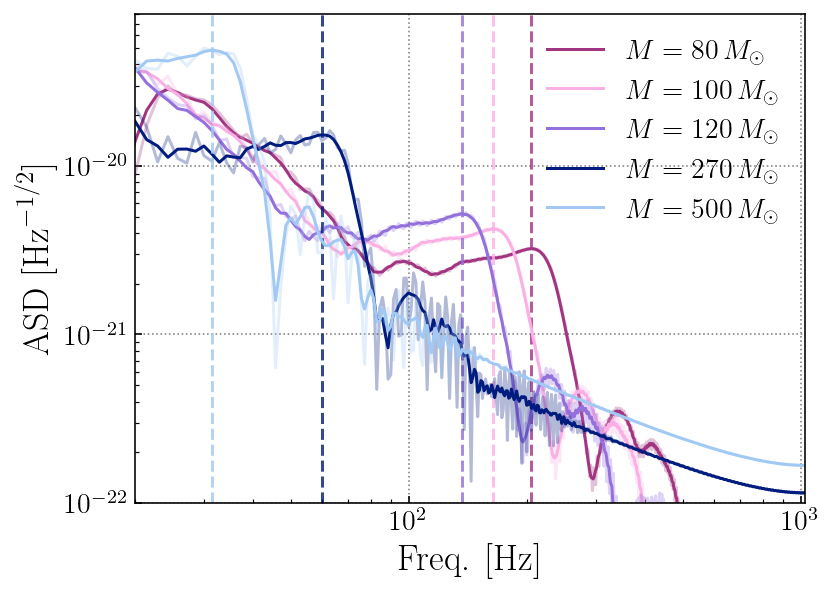

In [5]:
plt.figure()

for k, c, l in zip(masses_to_plot, colors, labels):
    
    data = frequency_domain_data[k]
    
    plt.loglog(data['frequencies'], data['ASD'], color=c, alpha=0.3)
    plt.loglog(data['frequencies'], data['ASD_smoothed'], label=l, color=c)        
    plt.axvline(data['merger_frequency'], color=c, alpha=0.8, ls='--')

plt.xlim(20,1024)
plt.ylim(1e-22,8e-20)
plt.legend(loc='upper right')
plt.xlabel('Freq. [Hz]')
plt.ylabel(r'ASD [$\mathrm{Hz}^{-1/2}$]')
plt.savefig('figure_11.png', dpi=300, bbox_inches='tight')
plt.show()